In [1]:
import numpy as np
import visualkeras as vk # pip install visualkeras
import pandas as pd
import seaborn as sn
from keras.models import Sequential
from matplotlib import pyplot as plt
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [2]:
train_data = np.load("train_data.npy")
test_data = np.load("test_data.npy")
train_labels = np.load("train_labels.npy")
test_labels = np.load("test_labels.npy")

In [3]:
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation="relu"))
model.add(BatchNormalization())

model.add(Conv2D(32, (5, 5), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dense(36, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 32)        25632     
                                                                 
 batch_normalization_1 (Batc  (None, 20, 20, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 32)       0         
 )                                                               
                                                        

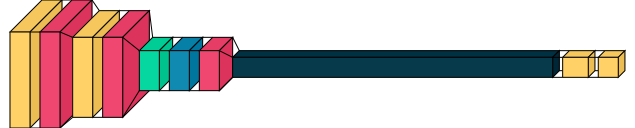

In [4]:
vk.layered_view(model)

In [5]:
best_loss_checkpoint = ModelCheckpoint(
    filepath="best_loss_model.h5",
    monitor="loss",
    save_best_only=True,
    save_weights_only=True,
    mode="min"
)

best_val_loss_checkpoint = ModelCheckpoint(
    filepath="best_val_loss_model.h5",
    monitor="val_loss",
    save_best_only=True,
    save_weights_only=True,
    mode="min"
)

In [6]:
history = model.fit(
    train_data,
    train_labels,
    validation_data=(test_data, test_labels), 
    epochs=10, 
    batch_size=200, 
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint]
)

Epoch 1/10
1770/1770 [==============================] - 742s 419ms/step - loss: 0.1579 - accuracy: 0.9546 - val_loss: 0.0839 - val_accuracy: 0.9752
Epoch 2/10
1770/1770 [==============================] - 2421s 1s/step - loss: 0.0697 - accuracy: 0.9790 - val_loss: 0.0642 - val_accuracy: 0.9813
Epoch 3/10
1770/1770 [==============================] - 958s 541ms/step - loss: 0.0509 - accuracy: 0.9842 - val_loss: 0.0591 - val_accuracy: 0.9831
Epoch 4/10
1770/1770 [==============================] - 687s 388ms/step - loss: 0.0398 - accuracy: 0.9873 - val_loss: 0.0510 - val_accuracy: 0.9854
Epoch 5/10
1770/1770 [==============================] - 690s 390ms/step - loss: 0.0316 - accuracy: 0.9898 - val_loss: 0.0571 - val_accuracy: 0.9835
Epoch 6/10
1770/1770 [==============================] - 724s 409ms/step - loss: 0.0273 - accuracy: 0.9910 - val_loss: 0.0475 - val_accuracy: 0.9877
Epoch 7/10
1770/1770 [==============================] - 950s 537ms/step - loss: 0.0237 - accuracy: 0.9922 - val_lo

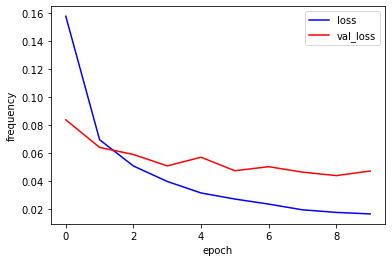

In [7]:
plt.plot(history.history["loss"], 'b', label="loss")
plt.plot(history.history["val_loss"], 'r', label="val_loss")
plt.xlabel("epoch")
plt.ylabel("frequency")
plt.legend()
plt.show()

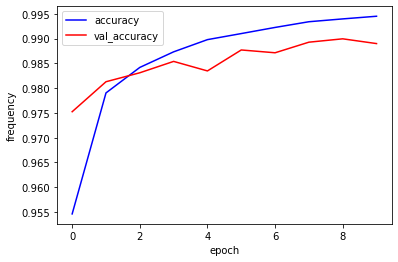

In [8]:
plt.plot(history.history["accuracy"], 'b', label="accuracy")
plt.plot(history.history["val_accuracy"], 'r', label="val_accuracy")
plt.xlabel("epoch")
plt.ylabel("frequency")
plt.legend()
plt.show()

In [9]:
model.load_weights("best_val_loss_model.h5")

In [10]:
loss, accuracy = model.evaluate(test_data, test_labels)
print(loss, accuracy)

2766/2766 [==============================] - 39s 14ms/step - loss: 0.0440 - accuracy: 0.9899
0.04401710629463196 0.9899423718452454


In [11]:
predictions = model.predict(test_data)

In [12]:
confusion = confusion_matrix(
    np.argmax(test_labels, axis=1),
    np.argmax(predictions, axis=1)
)
print(confusion)

[[2801    0    0 ...    0    0    0]
 [   0 1696    0 ...    0    5    0]
 [   0    0 4641 ...    0    0    0]
 ...
 [   0    0    0 ... 1463    1    0]
 [   1    6    0 ...    1 1328    2]
 [   0    0    0 ...   17    4 1348]]


<AxesSubplot:xlabel='predicted', ylabel='actual'>

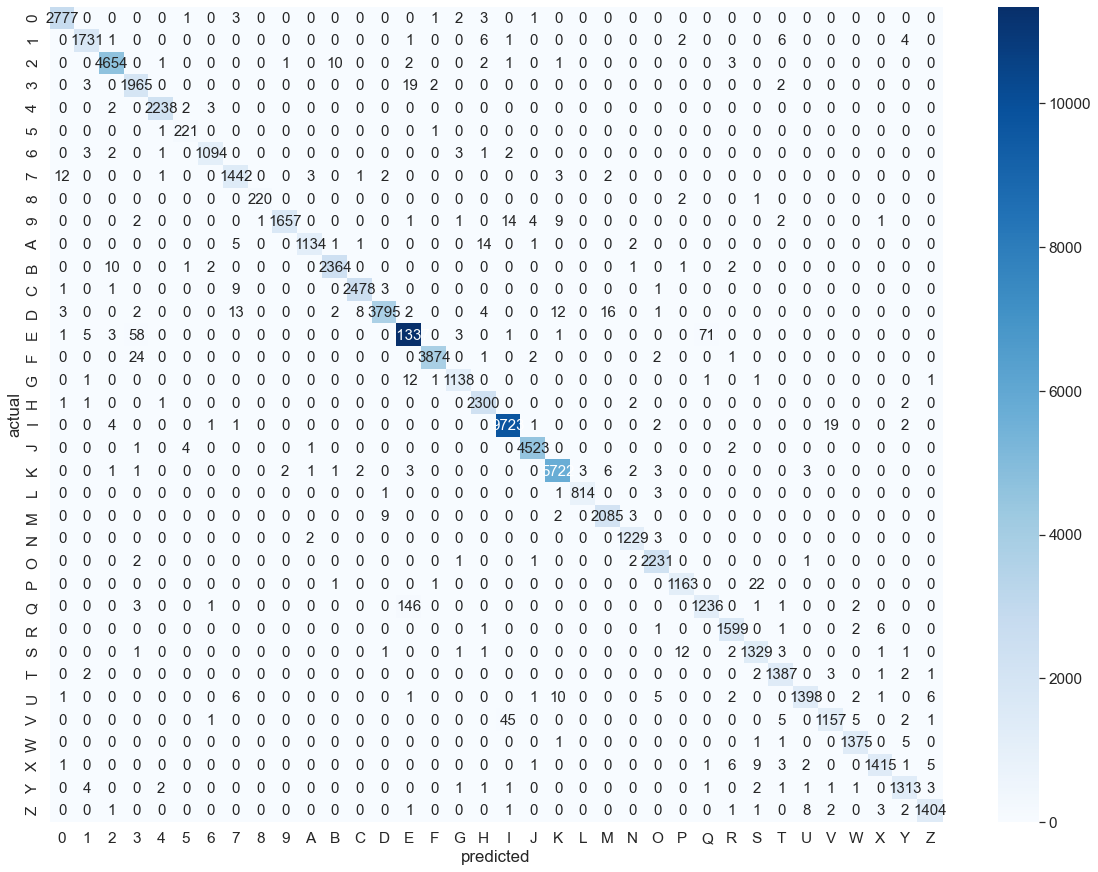

In [13]:
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

df_cm = pd.DataFrame(confusion, columns=np.unique(labels), index = np.unique(labels))
df_cm.index.name = 'actual'
df_cm.columns.name = 'predicted'
plt.figure(figsize = (20,15))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 15}, fmt="d")